#                  Yichun Chen Midterm Covid19 Python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn import linear_model
%matplotlib inline

In [4]:
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv',thousands=',')
df.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
46915,06/07/2020,SD,5438,NaN,NaN,71,0.0,65,64.0,1.0,0,1.0,06/08/2020 02:55:08 PM,NaN,Agree
46916,12/28/2021,NY,1833465,NaN,NaN,13006,0.0,23446,NaN,NaN,42,0.0,12/29/2021 02:30:55 PM,Not agree,Not agree
46917,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0,09/27/2021 01:21:43 PM,Agree,Agree
46918,03/10/2021,SD,113962,NaN,NaN,209,37.0,1904,1546.0,358.0,3,0.0,03/11/2021 03:36:21 PM,NaN,Agree
46919,05/27/2021,OH,1100312,921199.0,179113.0,732,196.0,19753,19753.0,0.0,0,0.0,05/28/2021 01:29:21 PM,Agree,Agree


## 1 - Exploratory data analysis (EDA); 
identify the data types; 
conduct data cleansing and modification as needed;
info re data types.

In [5]:
# check number of rows and number of columns:
df.shape

(46920, 15)

In [6]:
# check number of unique values:
df.nunique()

submission_date      782
state                 60
tot_cases          35611
conf_cases         21556
prob_cases         15319
new_case            7461
pnew_case           2907
tot_death          15924
conf_death         11945
prob_death          3642
new_death            503
pnew_death           313
created_at          1776
consent_cases          2
consent_deaths         2
dtype: int64

In [7]:
# check column names:
list(df)

['submission_date',
 'state',
 'tot_cases',
 'conf_cases',
 'prob_cases',
 'new_case',
 'pnew_case',
 'tot_death',
 'conf_death',
 'prob_death',
 'new_death',
 'pnew_death',
 'created_at',
 'consent_cases',
 'consent_deaths']

In [8]:
# rename column names:
df.rename(columns={'tot_cases':'total_cases',
    'conf_cases':'confirmed_cases',
    'prob_cases':'probable_cases',
    'pnew_case':'probable_new_cases', 
    'tot_death':'total_death',
    'conf_death':'confirmed_death',
    'prob_death':'probable_death',
                  'pnew_death':'probable_new_death'},inplace=True)

In [9]:
# check data types and structure:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46920 entries, 0 to 46919
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   submission_date     46920 non-null  object 
 1   state               46920 non-null  object 
 2   total_cases         46920 non-null  int64  
 3   confirmed_cases     25673 non-null  float64
 4   probable_cases      25601 non-null  float64
 5   new_case            46920 non-null  int64  
 6   probable_new_cases  43136 non-null  float64
 7   total_death         46920 non-null  int64  
 8   confirmed_death     25303 non-null  float64
 9   probable_death      25303 non-null  float64
 10  new_death           46920 non-null  int64  
 11  probable_new_death  43121 non-null  float64
 12  created_at          46920 non-null  object 
 13  consent_cases       39095 non-null  object 
 14  consent_deaths      39882 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 5.4+

In [10]:
# check null values:
df.isna().sum()

submission_date           0
state                     0
total_cases               0
confirmed_cases       21247
probable_cases        21319
new_case                  0
probable_new_cases     3784
total_death               0
confirmed_death       21617
probable_death        21617
new_death                 0
probable_new_death     3799
created_at                0
consent_cases          7825
consent_deaths         7038
dtype: int64

In [11]:
# change two columns from string data type to datetime:
df['submission_date'] = pd.to_datetime(df['submission_date'],format='%m/%d/%Y') # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
df['created_at'] = pd.to_datetime(df['created_at']) 


In [12]:
# set 'submission_date' column as the index:
df.set_index('submission_date',inplace=True, drop=False)

In [13]:
# add two columns 'year' and 'week':
df['year'] = df['submission_date'].dt.isocalendar().year
df['week'] = df['submission_date'].dt.isocalendar().week

# check if the two columns are added correctly:
df[['year','week']].head()

,year,week
submission_date,,
2021-03-11,2021,10
2021-02-12,2021,6
2020-02-04,2020,6
2020-08-22,2020,34
2021-12-06,2021,49


In [14]:
#df['week_of_year'] = df['submission_date'].dt.strftime("%Y Week %W") 

In [15]:
# add week and year
df['week_of_year'] = df['year'].astype(str).str.cat(df['week'].astype(str),sep='-')

In [16]:
# check data types again:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46920 entries, 2021-03-11 to 2021-05-27
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   submission_date     46920 non-null  datetime64[ns]
 1   state               46920 non-null  object        
 2   total_cases         46920 non-null  int64         
 3   confirmed_cases     25673 non-null  float64       
 4   probable_cases      25601 non-null  float64       
 5   new_case            46920 non-null  int64         
 6   probable_new_cases  43136 non-null  float64       
 7   total_death         46920 non-null  int64         
 8   confirmed_death     25303 non-null  float64       
 9   probable_death      25303 non-null  float64       
 10  new_death           46920 non-null  int64         
 11  probable_new_death  43121 non-null  float64       
 12  created_at          46920 non-null  datetime64[ns]
 13  consent_cases       39095 non

####  If a column containing numbers uses"," as a thousand separator, we need to pass the argument " thousands=',' otherwise Pandas will treat the column data type as "object" instead of a numeric data type when reading a  file.
In this project, after the 'thousands' argument was added, the numbers columns were read in successfully with 'int64' datatype; note that columns with null values (such as 'confirmed_cases, probable_cases') were read as 'float64'.




## 2 - Descriptive Statistical Analysis: 
mean, median, and range of data during the period provided in the US.  
Use tables, and graphs, plots, and bar charts to show your results for the top 20 states based on the highest cases reported.  
Do not print the actual data.  Points will be deducted for printing raw data.  
Brief interpretation of your results.  

In [17]:
# mean, median, and range of data:
df.describe()

,total_cases,confirmed_cases,probable_cases,new_case,probable_new_cases,total_death,confirmed_death,probable_death,new_death,probable_new_death,year,week
count,4.692000e+04,2.567300e+04,25601.000000,46920.000000,43136.000000,46920.000000,25303.000000,25303.000000,46920.000000,43121.000000,46920.000000,46920.000000
mean,4.306415e+05,4.476553e+05,63687.287723,1681.490452,269.326943,7215.808994,7571.688930,825.253172,20.140963,2.063357,2020.644501,25.572890
std,7.881207e+05,7.304531e+05,99959.816356,5374.771999,1584.931622,11799.416629,9589.868691,1236.699050,47.525042,27.688949,0.638871,15.424319
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000,2020.000000,1.000000
25%,7.987250e+03,4.355900e+04,41.000000,28.000000,0.000000,162.000000,870.500000,0.000000,0.000000,0.000000,2020.000000,11.000000
50%,1.321555e+05,1.983300e+05,12590.000000,391.000000,4.000000,2244.500000,3915.000000,231.000000,4.000000,0.000000,2021.000000,25.000000
75%,5.340890e+05,6.130760e+05,94775.000000,1457.000000,176.000000,9085.000000,10692.000000,1125.000000,20.000000,1.000000,2021.000000,39.000000
max,9.019412e+06,8.426700e+06,599278.000000,319809.000000,171617.000000,86387.000000,71408.000000,6452.000000,1178.000000,2919.000000,2022.000000,53.000000


In [18]:
#top 20 states based on the highest total cases:
df_top20 = df.groupby('state').sum().sort_values(by='total_cases',ascending=False).head(20)
df_top20

,total_cases,confirmed_cases,probable_cases,new_case,probable_new_cases,total_death,confirmed_death,probable_death,new_death,probable_new_death,year,week
state,,,,,,,,,,,,
CA,2221347672,2.148111e+09,73236762.0,8842162,415462.0,31044198,20529490.0,0.0,86387,0.0,1580144,19998
TX,1784601147,0.000000e+00,0.0,6438278,1075994.0,29019755,0.0,0.0,85039,0.0,1580144,19998
FL,1504312622,0.000000e+00,0.0,5827432,1278208.0,23772646,0.0,0.0,72039,4795.0,1580144,19998
IL,812562865,8.119085e+08,308537.0,3045718,0.0,14019128,12751593.0,1256348.0,37310,4235.0,1580144,19998
PA,691898874,5.831734e+08,108725428.0,2752633,473030.0,14948294,0.0,0.0,43839,4582.0,1580144,19998
GA,690021139,5.514996e+08,138521526.0,2476516,558133.0,11874790,10327385.0,1538653.0,35727,5330.0,1580144,19998
NY,671564428,0.000000e+00,0.0,2644864,0.0,11338034,0.0,0.0,27448,0.0,1580144,19998
OH,668219427,5.494874e+08,118664879.0,2659681,599278.0,10824032,10652199.0,169129.0,33647,0.0,1580144,19998
NC,621050034,5.336595e+08,87390509.0,2608603,425385.0,7651526,6817284.0,834242.0,22922,2916.0,1580144,19998


<AxesSubplot:title={'center':'Total Cases in Top 20 States'}, xlabel='state', ylabel='Total Cases'>

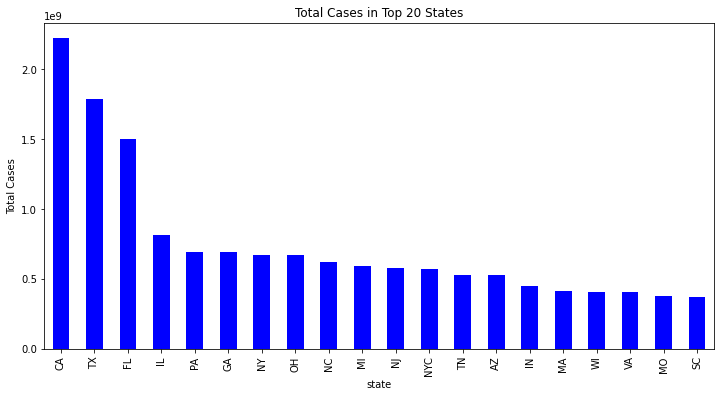

In [19]:
# let's draw a bar chart to  visually see the total cases in the top 20 states:
df_top20['total_cases'].plot(kind='bar',figsize=(12,6),color='blue',title='Total Cases in Top 20 States',ylabel='Total Cases')

Text(0.5, 1.0, 'Total Cases vs Total Death in Top 20 States')

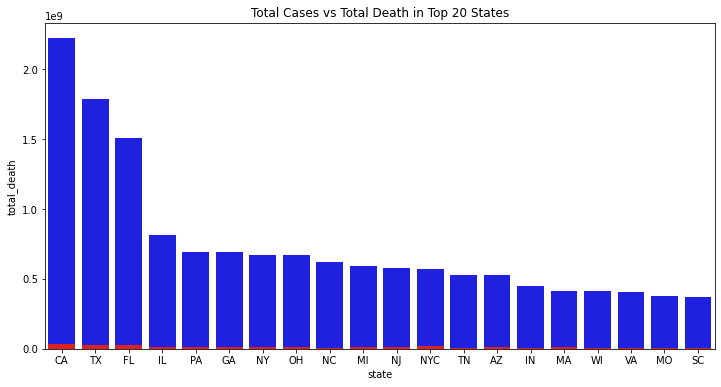

In [20]:
# we can also use the seaborn to bar charts to display a comparison between total cases and total death
plt.figure(figsize=(12,6))
sns.barplot(data=df_top20,x=df_top20.index,y='total_cases',color='blue')
sns.barplot(data=df_top20,x=df_top20.index,y='total_death',color='red')
plt.title('Total Cases vs Total Death in Top 20 States')

##### California (CA) state has the hightest total cases, followed by TX state and FL state.Death number was low, as compared with the total cases, suggesting the death rate was low(thank goodness!)

## 3 - Trend analysis over the period provided for the US as well as top 3 states. 
Use graphs / plots as well as a combined plot for the US vs top 3 states for comparison.  
Brief interpretation of your results.

Text(0.5, 1.0, 'Trend for New Cases in US')

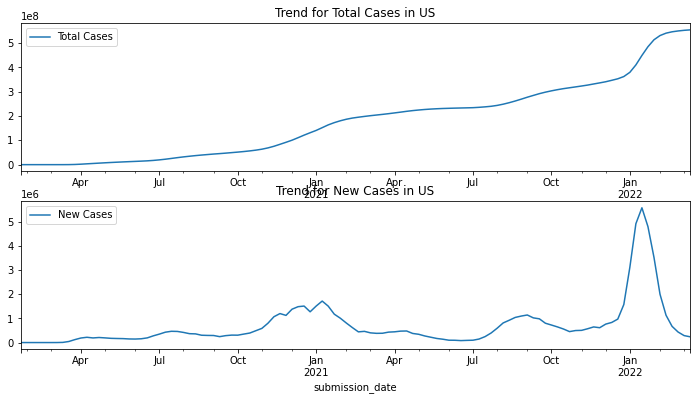

In [21]:
# trend for total cases:
plt.subplot(2,1,1)
df['total_cases'].resample('w').sum().plot(label='Total Cases',figsize=(12,6))
plt.legend()
plt.title('Trend for Total Cases in US')

# trend for new cases:
plt.subplot(2,1,2)
df['new_case'].resample('w').sum().plot(label='New Cases',figsize=(12,6))
plt.legend()
plt.title('Trend for New Cases in US')

##### Trend:
- total cases: shows constant increasing trend, with very sharp increase around 2021 January and 2022 January
- new cases: Around November of 2020, the new cases exprienced a sharp rise, probably due to holidays, but starting in mid January of 2021, the new cases dropped very quickly. Due to Delta variant, 2021 July-Sept saw a sharp increase of new cases. Around January 2022, new cases rised abruptly due to Omicron variant, with the peak in mid January.

Text(0.5, 1.0, 'Trend for New Death in US')

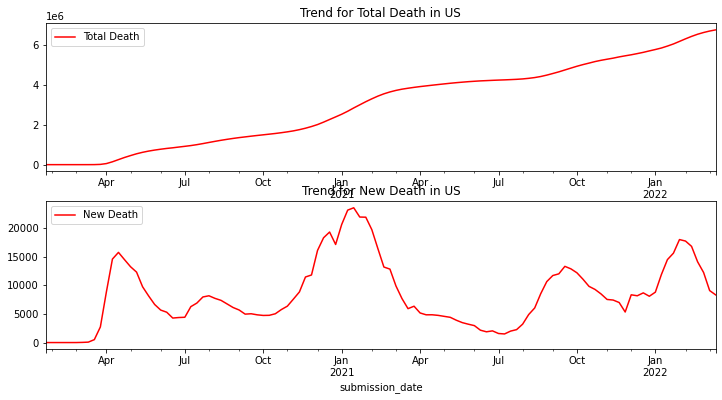

In [22]:
# trend for total death in US:
plt.subplot(2,1,1)
df['total_death'].resample('w').sum().plot(label='Total Death',figsize=(12,6),color='red')
plt.legend()
plt.title('Trend for Total Death in US')

# trend for new death  in US:
plt.subplot(2,1,2)
df['new_death'].resample('w').sum().plot(label='New Death',figsize=(12,6),color='red')
plt.legend(loc='upper left')
plt.title('Trend for New Death in US')


##### Trend:
- total death: shows constant increasing trend.
- new death: shows an up and down trend, with some peaks around 2020 mid April (start of pandemic), 2021 mid January (after winter holidays), 2021 mid September (Delta variant) and 2022 Februrary (Omicron variant)

Text(0.5, 1.0, 'total case vs total death in US')

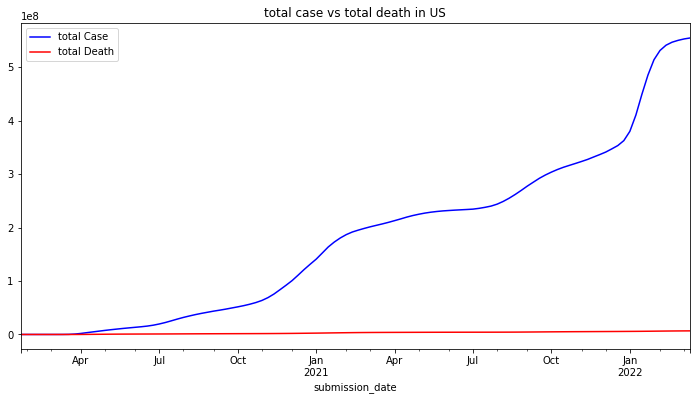

In [23]:
# plot total case vs total death on same plot:
df['total_cases'].resample('w').sum().plot(label='total Case',figsize=(12,6),color='blue')
df['total_death'].resample('w').sum().plot(label='total Death',figsize=(12,6),color='red')
plt.legend()
plt.title('total case vs total death in US')

Text(0.5, 1.0, 'New case vs new death in US')

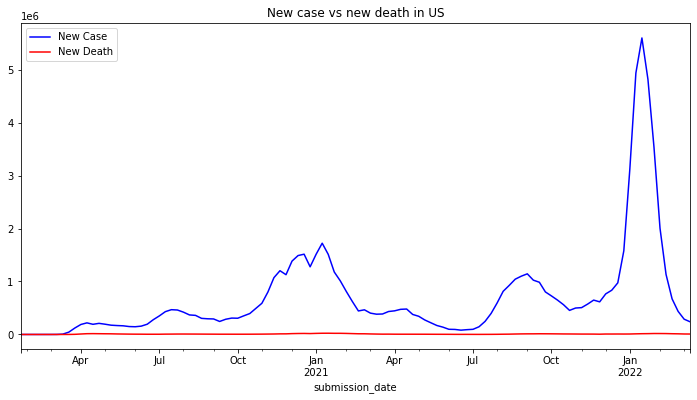

In [24]:
# plot new case vs new death on same plot:
df['new_case'].resample('w').sum().plot(label='New Case',figsize=(12,6),color='blue')
df['new_death'].resample('w').sum().plot(label='New Death',figsize=(12,6),color='red')
plt.legend()
plt.title('New case vs new death in US')

In [25]:
###df.pivot_table(values=['total_cases','new_case','total_death','new_death'],
###index=['year','week','state'],
###aggfunc='sum')

In [26]:
# df3 = df2.sort_values(by=['year','week','total_cases'],ascending = [True, True, False])

#####  Let's start analyzing the 3 top states' trend:

In [27]:
# identify the top 3 states based on total cases:
df_top3 = df.groupby('state').sum().sort_values(by='total_cases',ascending=False).head(3)
df_top3

,total_cases,confirmed_cases,probable_cases,new_case,probable_new_cases,total_death,confirmed_death,probable_death,new_death,probable_new_death,year,week
state,,,,,,,,,,,,
CA,2221347672,2.148111e+09,73236762.0,8842162,415462.0,31044198,20529490.0,0.0,86387,0.0,1580144,19998
TX,1784601147,0.000000e+00,0.0,6438278,1075994.0,29019755,0.0,0.0,85039,0.0,1580144,19998
FL,1504312622,0.000000e+00,0.0,5827432,1278208.0,23772646,0.0,0.0,72039,4795.0,1580144,19998


In [28]:
# create a groupby object:
df_grouped = df.groupby('state')

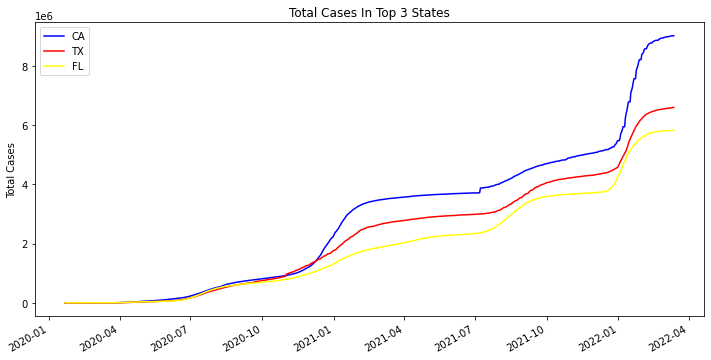

In [29]:
# get a dataset for each of the top 3 states (CA, TX, FL) using "get_group" method, and then plot the trend
plt.figure(figsize=(12,6))
df_grouped.get_group('CA')['total_cases'].plot(label = 'CA',color='blue', title='total cases in top 3 states'.title())
df_grouped.get_group('TX')['total_cases'].plot(label = 'TX',color='red')
df_grouped.get_group('FL')['total_cases'].plot(label = 'FL',color='yellow')
plt.xlabel('')
plt.ylabel('Total Cases')
plt.legend()


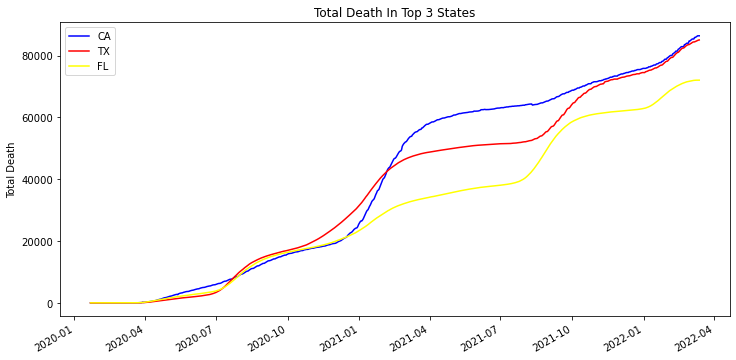

In [30]:
# Total death of the top 3 states (CA, TX, FL) :
plt.figure(figsize=(12,6))
df_grouped.get_group('CA')['total_death'].plot(label = 'CA',color='blue', title='total death in top 3 states'.title())
df_grouped.get_group('TX')['total_death'].plot(label = 'TX',color='red')
df_grouped.get_group('FL')['total_death'].plot(label = 'FL',color='yellow')
plt.xlabel('')
plt.ylabel('Total Death')
plt.legend()

<AxesSubplot:title={'center':'Total cases vs toal death in CA'}>

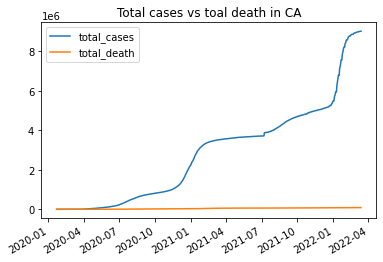

In [31]:
# Total death of the top 3 states (CA, TX, FL) :
df_grouped.get_group('CA')[['total_cases','total_death']].plot(title='Total cases vs toal death in CA',xlabel='')


##### combined plot of US and top 3 states:

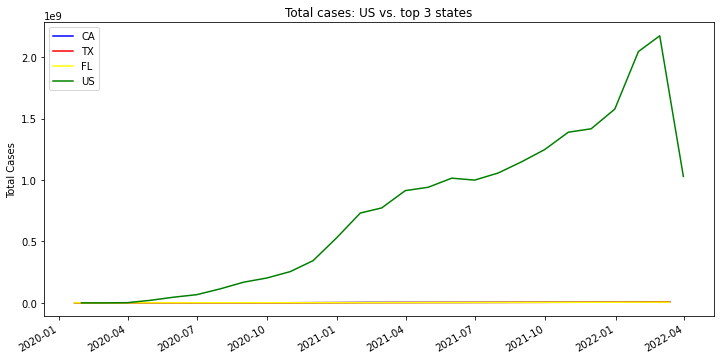

In [32]:
# combined plot of US and top 3 states: total cases
plt.figure(figsize=(12,6))
df_grouped.get_group('CA')['total_cases'].plot(label = 'CA',color='blue', title='Total cases: US vs. top 3 states')
df_grouped.get_group('TX')['total_cases'].plot(label = 'TX',color='red')
df_grouped.get_group('FL')['total_cases'].plot(label = 'FL',color='yellow')
df['total_cases'].resample('m').sum().plot(label = 'US',color='green')
plt.xlabel('')
plt.ylabel('Total Cases')
plt.legend()


No handles with labels found to put in legend.


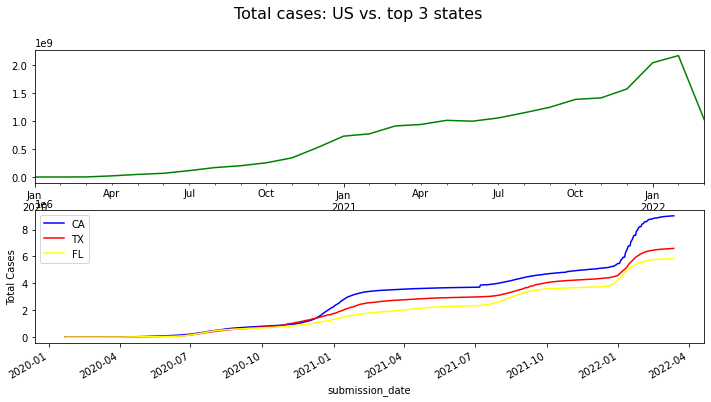

In [33]:
# combined plot of US and top 3 states: total cases
fig,ax=plt.subplots(2,1,figsize=(12,6))
plt.suptitle('Total cases: US vs. top 3 states',fontsize=16)

# entire US:
df['total_cases'].resample('m').sum().plot(label = 'US',color='green',ax=ax[0])
plt.xlabel('')
plt.ylabel('Total Cases')
plt.legend()


# top 3 states:
df_grouped.get_group('CA')['total_cases'].plot(label = 'CA',color='blue',ax=ax[1])
df_grouped.get_group('TX')['total_cases'].plot(label = 'TX',color='red',ax=ax[1])
df_grouped.get_group('FL')['total_cases'].plot(label = 'FL',color='yellow',ax=ax[1])
plt.legend()



### Interpretation:

- total cases: shows constant increasing trend, with very sharp increase around 2021 January and 2022 January
- new cases: Around November of 2020, the new cases exprienced a sharp rise, probably due to holidays, but starting in mid January of 2021, the new cases dropped very quickly. Due to Delta variant, 2021 July-Sept saw a sharp increase of new cases. Around January 2022, new cases rised abruptly due to Omicron variant, with the peak in mid January.
- total death: shows a constantly increasing trend.
- new death: shows an up and down trend, with some peaks around 2020 mid April (start of pandemic), 2021 mid January (after winter holidays), 2021 mid September (Delta variant) and 2022 Februrary (Omicron variant)
- Death number was low, as compared with the total cases, suggesting the death rate was low(thank goodness!)

- Top 3 states based on total cases (CA,TX,FL): CA state has the hightest total cases, followed by TX state and FL state.
 
- From the combined line graph, we can see the top 3 states' trend is consitent with the entire US.


## 4 - Weekly rolling average for the US new cases. Brief interpretation of your results.

In [34]:
# sort the index (submission_date is the index):
df_datesorted = df.sort_index() # to use rolling, the date must be sorted.

In [98]:
# get weekly rolling average for the new cases:
new_cases = df_datesorted['new_case'].groupby('submission_date').sum()
df_MA = new_cases.rolling(pd.Timedelta("1W")).mean()

# randomly select 20 rows to check:
df_MA.sample(20)

submission_date
2020-02-19         1.571429
2021-08-08    116405.857143
2021-01-06    224113.285714
2020-10-14     53196.285714
2020-11-14    149239.857143
2021-07-21     43093.428571
2020-05-22     23741.714286
2022-01-29    527293.428571
2021-01-24    168483.571429
2021-07-11     20804.142857
2021-05-30     19801.000000
2020-06-08     20962.142857
2020-05-08     26117.285714
2020-03-01         7.428571
2020-08-15     52148.000000
2021-10-25     67715.142857
2020-11-22    171938.285714
2020-03-04        27.571429
2021-12-18    132613.285714
2020-10-17     55836.571429
Name: new_case, dtype: float64

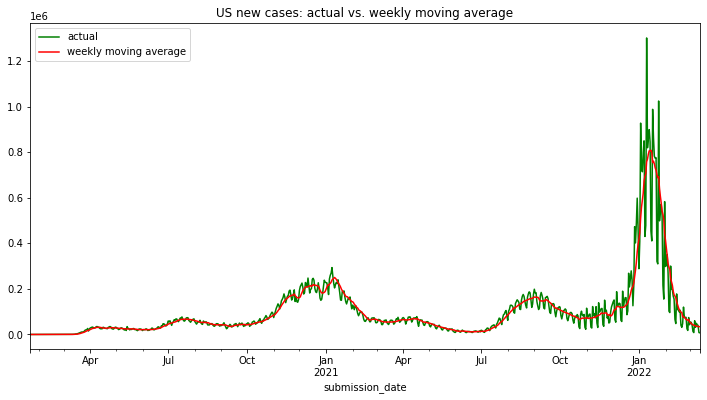

In [156]:
#plot:
plt.figure(figsize=(12,6))
new_cases.plot(color='g',label='actual')
df_MA.plot(color='r',label='weekly moving average')
plt.legend()
plt.title('US new cases: actual vs. weekly moving average')
plt.show()

#### Brief interpretation:
new cases: The moving average plot shows a trend of several ups and downs:
- Around November of 2020, the new cases exprienced a sharp rise, probably due to holidays, but starting in mid January of 2021, the new cases dropped very quickly. 
- 2021 July-Sept saw a sharp increase of new cases, due to Delta variant. After September 2021, it started to drop;
- Around January 2022, new cases rised abruptly due to Omicron variant, with the peak in mid January. We can also see that the number of new cases has returned to pre-Omicron level starting around mid Feburuary of 2022.

## 5 - Concluding remarks and inferential analysis based on weekly rolling average trend analysis.  A brief paragraph summarizing your observations.

In [164]:
diff = new_cases.diff().iloc[1:]
seasonal_decompose(diff,model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

/Users/yichunchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


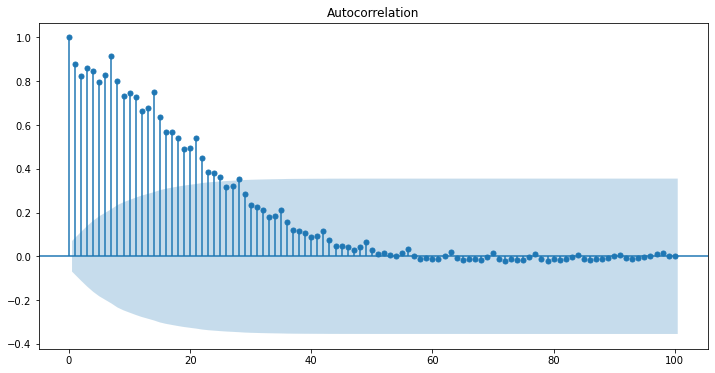

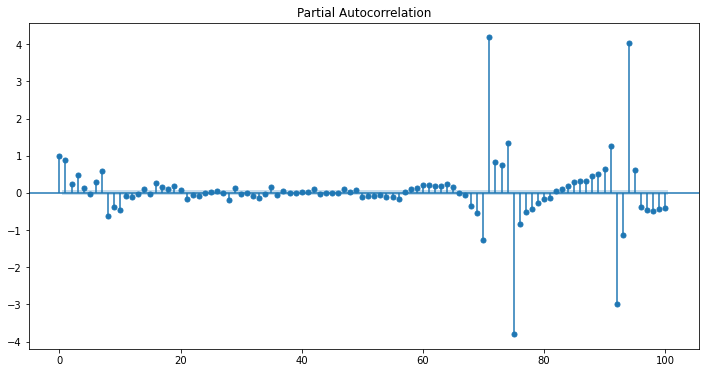

In [137]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
_ = plot_acf(new_cases,lags=100)
_ = plot_pacf(new_cases,lags=100)

In [142]:
# log transformation to achieve stationality:
new_cases_log = new_cases.map(np.log1p)
# filter out data before 2020-04-01:
new_cases_log = new_cases_log["2020-04-01":]
new_cases_log 

submission_date
2020-04-01    10.253581
2020-04-02    10.309253
2020-04-03    10.369797
2020-04-04    10.386161
2020-04-05    10.205516
                ...    
2022-03-09    10.796817
2022-03-10    10.658811
2022-03-11    10.589686
2022-03-12     9.034080
2022-03-13     8.893298
Name: new_case, Length: 712, dtype: float64

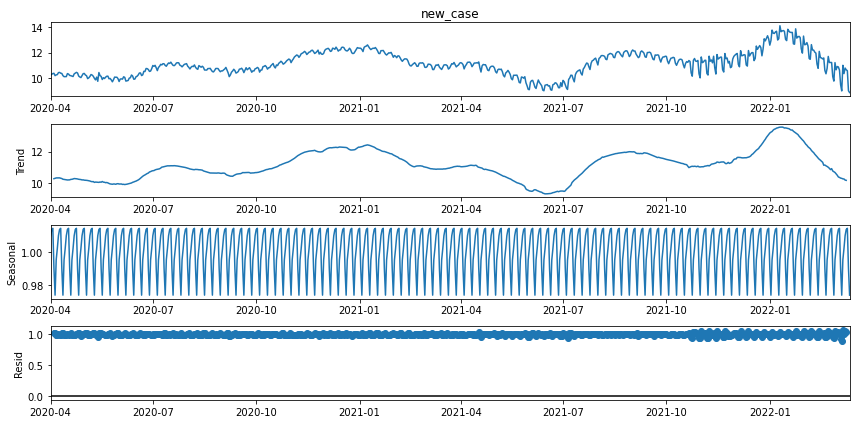

In [144]:
seasonal_decompose(new_cases_log, model='multiplicative').plot();

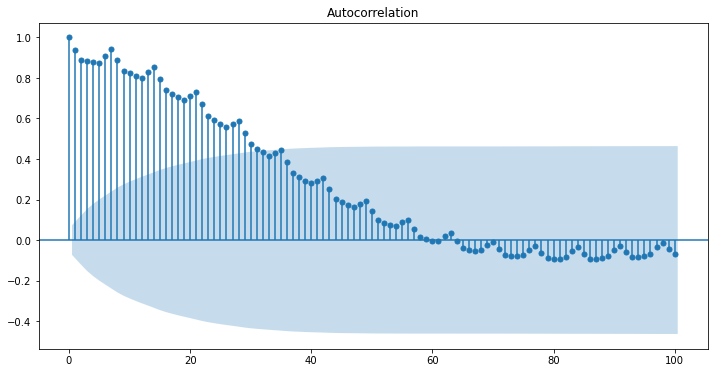

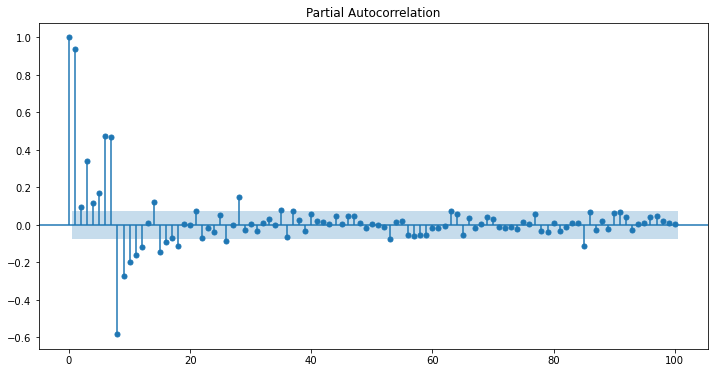

In [153]:
_ = plot_acf(new_cases_log,lags=100)
_ = plot_pacf(new_cases_log,lags=100)

In [167]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(new_cases_log, order=(2,1,2))
results = model.fit(disp=-1)

/Users/yichunchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/yichunchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


/Users/yichunchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


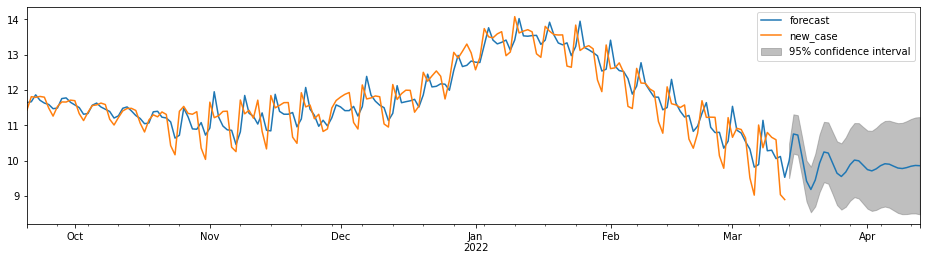

In [170]:
fig, ax = plt.subplots(figsize=(16,4))
_ = results.plot_predict(start="2021-09-20", end='2022-04-13', ax=ax)

### Summary:
- Winter holidays is associated with a sharp increase of new cases. 
- Emergence of new variants will result in a sharp increase of new cases.
- Vaccinations/boosters will help cut down the infections.
- It's difficult to predict new cases because it is under influence of many other factors besides time and season, such as emergence of different virants, vaccination rate.
- The decomposition plots and the ACF plot showed 7-day seasonality, due to the cycle of data submission (fewer cases submitted on weekends)